# Imports & Read Data

In [1]:
import os
os.chdir('..')
from src.feature_engineering import freture_extract_All
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Show more columns
pd.set_option('display.max_columns', None) 

# Show more rows
pd.set_option('display.max_rows', 100) 

In [2]:
df = freture_extract_All()
df

,member_id,churn,outreach,months_in_app,diet_visits,physical_activity_visits,sleep_visits,resilience_visits,clinical_visits,total_health_visits,total_visits,non_relevant_visits,health_engagement_ratio,category_diversity,app_usage,icd_code_A09,icd_code_B34.9,icd_code_E11.9,icd_code_H10.9,icd_code_I10,icd_code_J00,icd_code_K21.9,icd_code_M54.5,icd_code_R51,icd_code_Z71.3,code_count,priority_condition_count
0,1,0,0,13,0.000000,0.000000,0.000000,0.000000,0.666667,0.666667,3.0,2.333333,0.222222,1.0,6.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,3.0
1,2,0,0,2,0.111111,0.222222,0.111111,0.111111,0.333333,0.888889,9.0,8.111111,0.098765,5.0,10.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,5.0,3.0
2,3,0,0,8,0.096154,0.115385,0.076923,0.057692,0.096154,0.442308,52.0,51.557692,0.008506,5.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0
3,4,1,0,13,0.000000,0.066667,0.133333,0.133333,0.133333,0.466667,15.0,14.533333,0.031111,4.0,10.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0
4,5,0,1,14,0.090909,0.181818,0.181818,0.000000,0.090909,0.545455,11.0,10.454545,0.049587,4.0,10.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,0,0,8,0.055556,0.111111,0.111111,0.055556,0.388889,0.722222,18.0,17.277778,0.040123,5.0,8.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,6.0,2.0
9996,9997,0,0,15,0.250000,0.250000,0.000000,0.000000,0.000000,0.500000,8.0,7.500000,0.062500,2.0,11.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,4.0,2.0
9997,9998,0,0,8,0.000000,0.125000,0.125000,0.000000,0.125000,0.375000,8.0,7.625000,0.046875,3.0,12.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,7.0,1.0
9998,9999,0,0,16,0.111111,0.083333,0.055556,0.027778,0.055556,0.333333,36.0,35.666667,0.009259,5.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,1.0


[Text(0, 0, '0.21'), Text(0, 0, '0.19')]

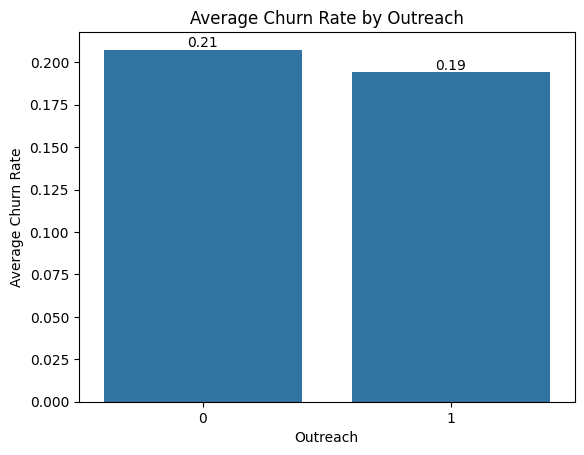

In [4]:
outreach_effect = df.groupby('outreach').agg({'churn': 'mean'}).reset_index()
ax = sns.barplot(data=outreach_effect, x='outreach', y='churn')
ax.set_xlabel('Outreach')
ax.set_ylabel('Average Churn Rate')
ax.set_title('Average Churn Rate by Outreach')
ax.bar_label(ax.containers[0], fmt='%.2f')

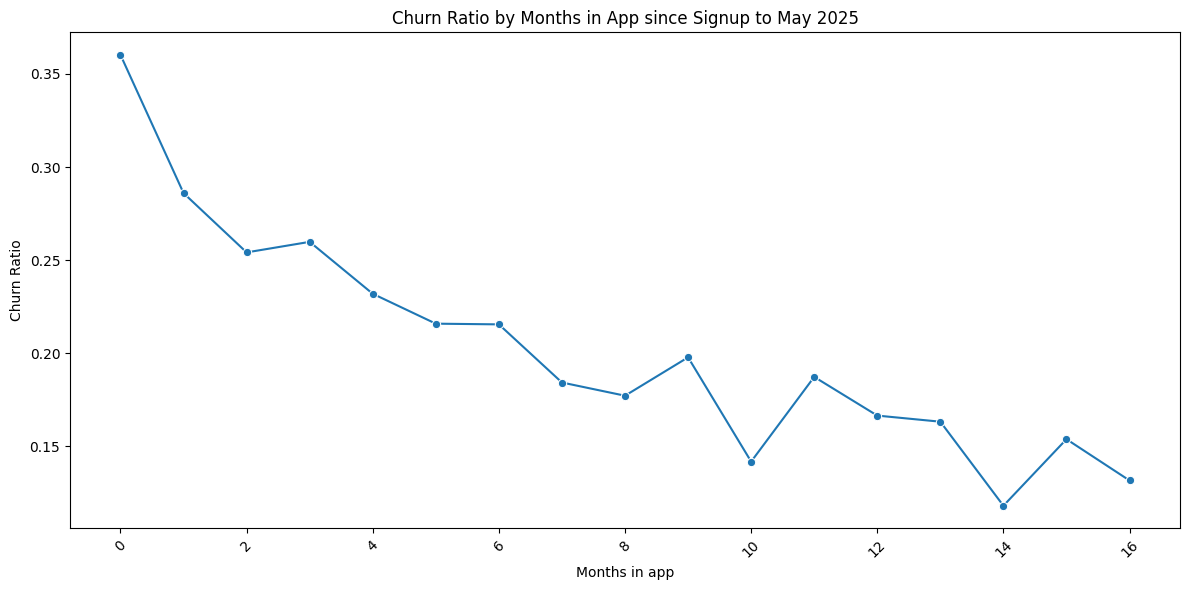

In [5]:
# Calculate churn ratio by year-month
churn_by_month = df.groupby('months_in_app').agg(
    churn_ratio=('churn', 'mean'),
    total_members=('member_id', 'count')
).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=churn_by_month, x='months_in_app', y='churn_ratio', marker='o')
plt.xticks(rotation=45)
plt.title('Churn Ratio by Months in App since Signup to May 2025')
plt.ylabel('Churn Ratio')
plt.xlabel('Months in app')
plt.tight_layout()
plt.show()

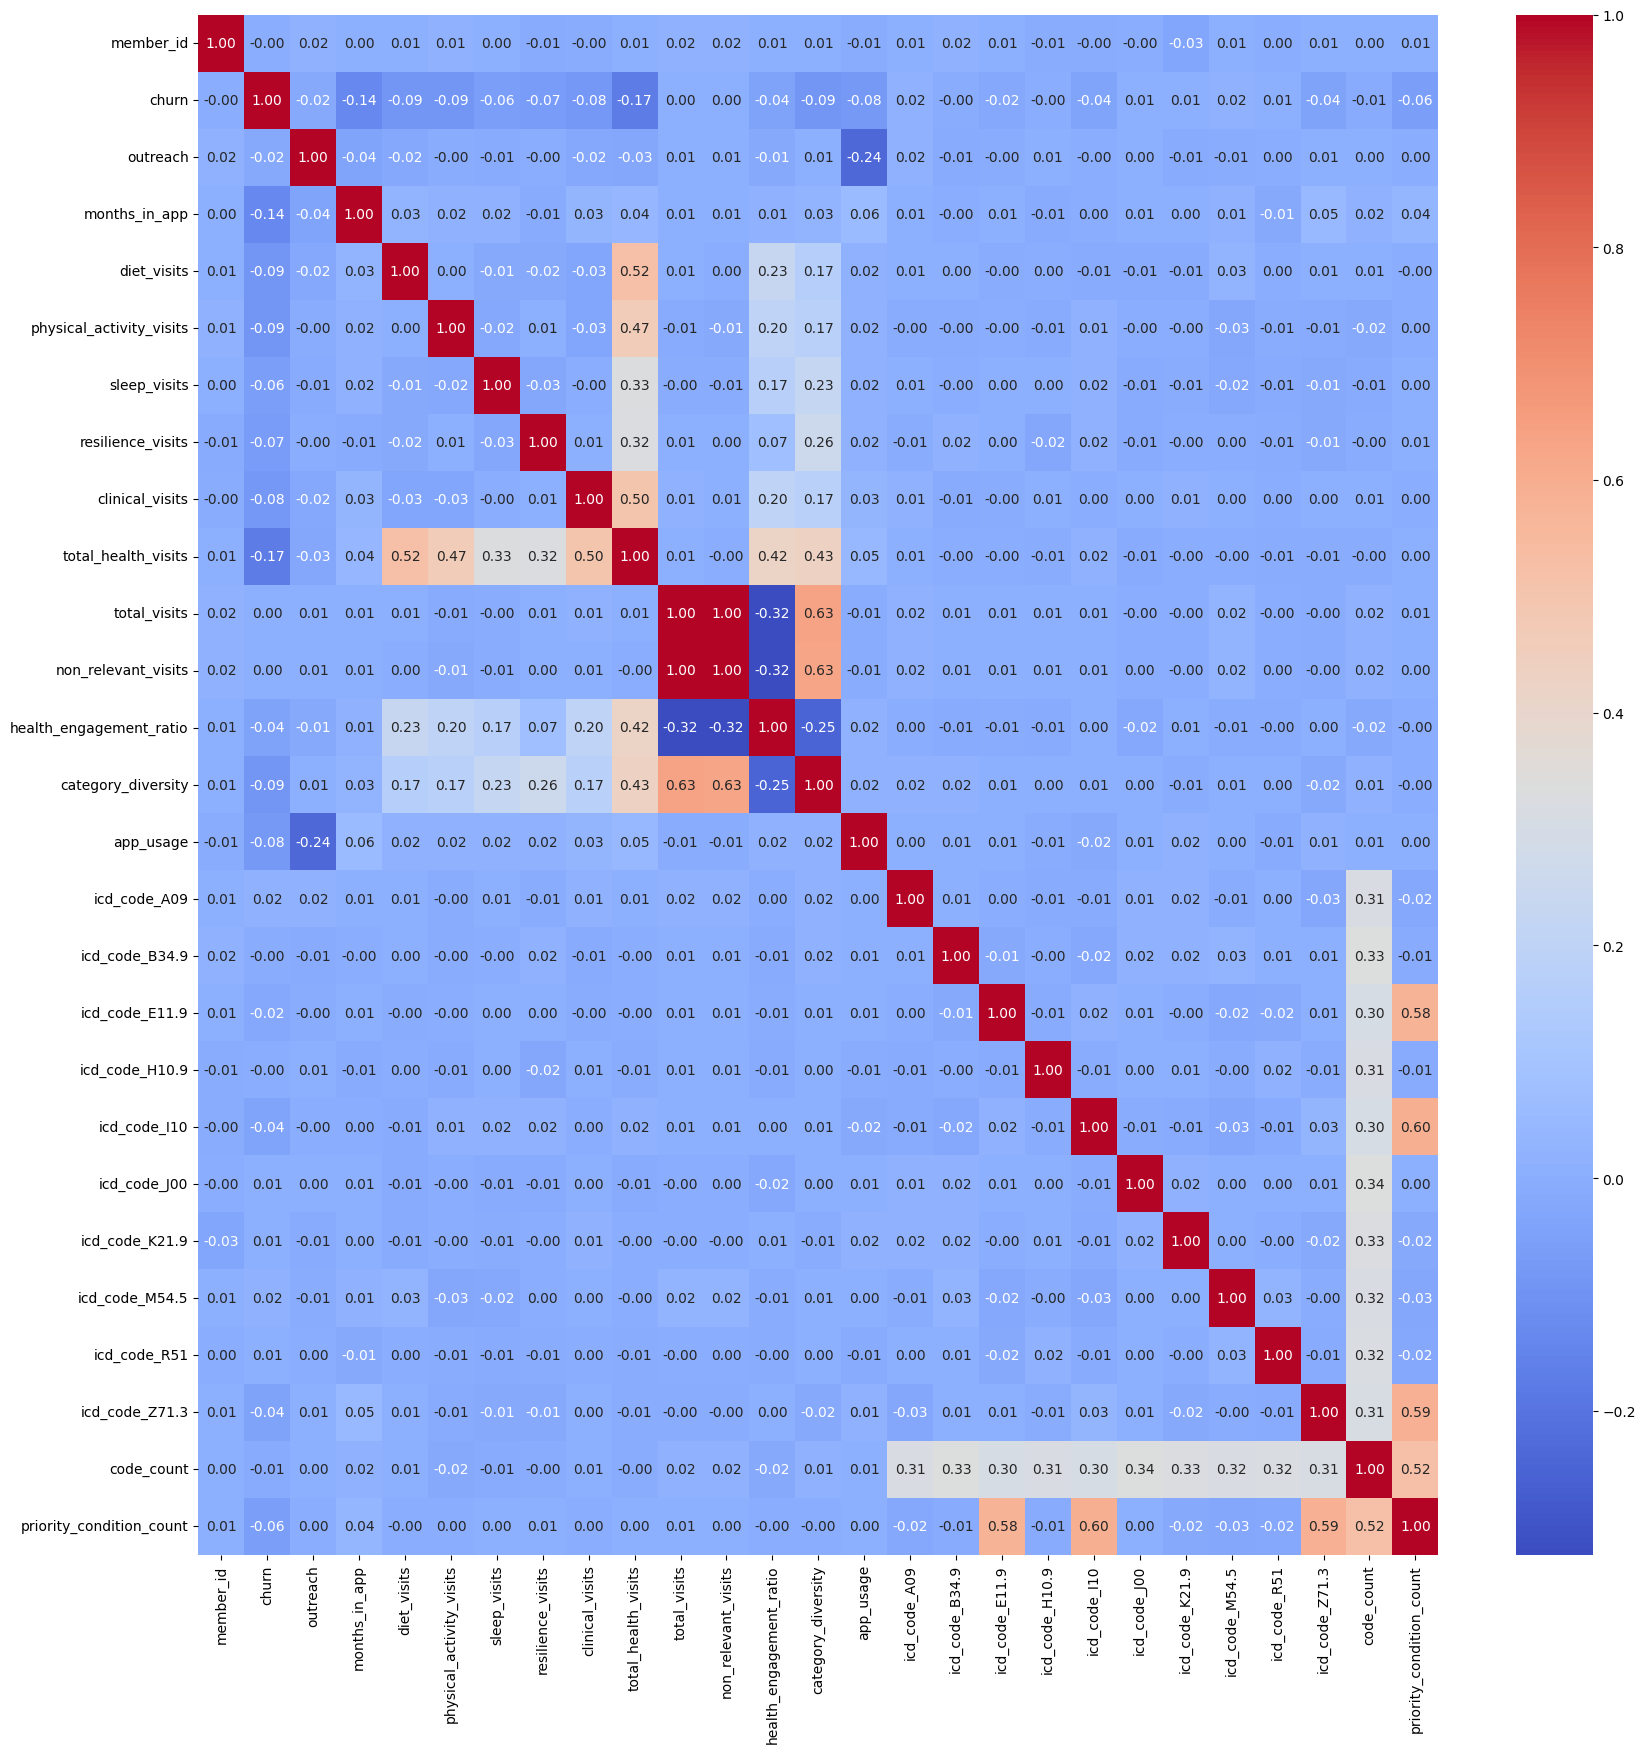

In [6]:
plt.figure(figsize=(20, 20))  # width, height in inches
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# Conclusions from data:

* The time window of the activity recording data is 2 weeks from 2025-07-01 to 2025-07-14.
* The signup to the aplication is between 2024-01-01 and 2025-05-31. all the useres are regestered at least one month to the app.
* New users are more likly to churn.